In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from train import train
from dataset import DoubleMnist
from model import DigitCaptioner


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [2]:
annotations_file = "data/labels.csv"
img_dir = "data/double_mnist"

batch_size = 1024
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data = DoubleMnist(annotations_file, img_dir, device)
train_set, test_set = torch.utils.data.random_split(data, [98000, 2000])
train_dataloader = DataLoader(train_set, batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=len(test_set))

In [3]:
model = DigitCaptioner(input_size=29, hidden_size=256, device=device)
hist_loss = train(model, train_dataloader, num_epochs=15)

 ---------------- Epoch: 1 ----------------
46.925575256347656
44.634254455566406
42.67979049682617
38.57493591308594
31.556922912597656
29.844436645507812
29.44140625
28.409351348876953
27.418264389038086
27.11042022705078
26.941272735595703
27.149330139160156
26.450204849243164
25.9472713470459
25.70258903503418
25.352571487426758
25.156757354736328
25.031057357788086
25.032447814941406
24.29039764404297
24.011234283447266
23.950645446777344
23.646846771240234
23.177122116088867
23.119949340820312
22.88115882873535
22.73612403869629
22.34589385986328
22.17725372314453
21.581371307373047
21.67013168334961
21.409561157226562
21.083850860595703
20.940162658691406
20.611709594726562
20.31806755065918
20.08575439453125
20.11173439025879
20.348115921020508
19.432823181152344
19.447002410888672
19.293556213378906
18.976858139038086
18.76772689819336
18.922391891479492
17.981399536132812
17.86264991760254
17.620330810546875
17.41282844543457
17.3641357421875
17.600238800048828
17.25410079956

In [4]:
model = DigitCaptioner(input_size=29, hidden_size=256, device=device)
valid_loss = []

for epoch in range(15):
    checkpoint = torch.load(f"checkpoints/epoch_{epoch + 1}.pt")
    model.load_state_dict(checkpoint['model_state_dict'])

    for test_features, test_labels in test_dataloader:
        imgs = test_features.clone().detach().float()
        x = test_labels.transpose(0, 1).float()

        with torch.no_grad():
            out = model.forward(x[:-1], imgs)

        loss = - torch.sum(out * x[1:]) / out.shape[1]
        valid_loss.append(loss.item())

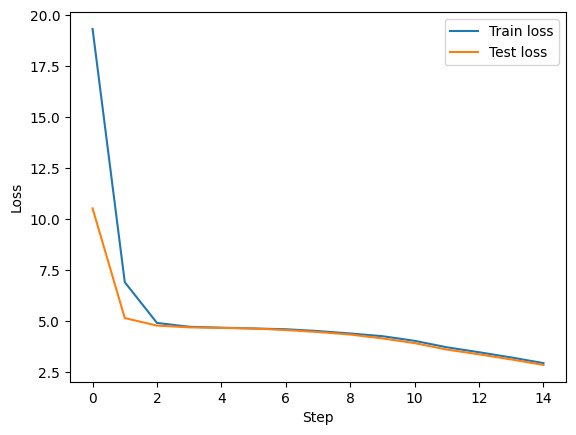

In [5]:
plt.plot(torch.tensor(hist_loss).view(15, -1).mean(dim=1), label="Train loss")
plt.plot(valid_loss, label="Test loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.show()